In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import re
#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', None)
# model
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Read 2 files: DC & Marvel:

In [2]:
DC=pd.read_csv('/Users/macbook/Documents/Iron Hack_Lab/Final P/Dc/DC.csv')

In [3]:
Marvel=pd.read_csv('/Users/macbook/Documents/Iron Hack_Lab/Final P/Marvel/marvel.csv')

## Data cleaning:

- Drop Unnamed column
- Change data type of column: date for visualization objective
- Extract new column with the rating number, change it to numeric
- Drop all nulls

In [4]:
#drop Unnamed  column
DC.drop(['Unnamed: 0.1','Unnamed: 0'],axis =1, inplace = True)

In [5]:
Marvel.drop(['Unnamed: 0.1','Unnamed: 0'],axis =1, inplace = True)

In [6]:
#change data type of date
DC['date']=pd.to_datetime(DC['date'],errors='coerce')

In [7]:
Marvel['date']=pd.to_datetime(Marvel['date'], errors='coerce')

In [8]:
#extract number of the rating
DC['rate']=DC['rating'].str[:2]

In [9]:
Marvel['rate']=Marvel['rating'].str[:2]

In [10]:
#remove '/' character in column 
DC['rate']=DC['rate'].str.replace('/','')

In [11]:
Marvel['rate']=Marvel['rate'].str.replace('/','')

In [12]:
#change data type to numeric
DC['rate']= DC['rate'].apply(pd.to_numeric) 

In [13]:
Marvel['rate']= Marvel['rate'].apply(pd.to_numeric) 

In [14]:
# drop 
DC.dropna(inplace=True)
DC.reset_index(drop=True,inplace=True)

In [15]:
Marvel.dropna(inplace=True)
Marvel.reset_index(drop=True,inplace=True)

In [16]:
DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_title  9694 non-null   object        
 1   date          9694 non-null   datetime64[ns]
 2   content       9694 non-null   object        
 3   rating        9694 non-null   object        
 4   movie_title   9694 non-null   object        
 5   rate          9694 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 454.5+ KB


In [17]:
DC[DC['rate']== 1]

review_title       date  \
57                      Everything shiny but no substance 2019-04-07   
124                                        is this a joke 2019-05-05   
138          One of the most boring films I've ever seen. 2019-03-24   
144                          dull over did special effect 2019-08-23   
166                          May it sleep with the fishes 2019-08-16   
...                                                   ...        ...   
9665         Looks like David Blaine found his new stunt! 2017-10-01   
9678                            Hmmmm...Not a masterpiece 2017-09-17   
9682                                            Terrible! 2018-01-18   
9688                                       Script doctor. 2017-08-30   
9692  Honestly I don't know what everyone is raving about 2018-04-08   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

<AxesSubplot:>

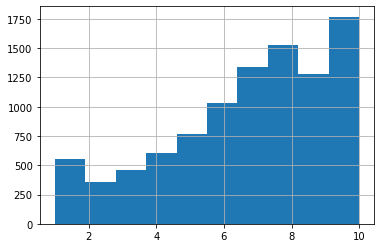

In [18]:
# visualize the rate column:
DC['rate'].hist()

<AxesSubplot:>

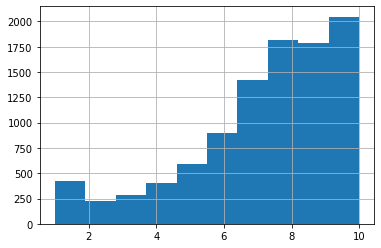

In [19]:
Marvel['rate'].hist()

## Explain method for this notebook:


- Because there is no label in our dataset, so i decided to make attempts with some unsupervised models as VADER, AFFIN to classify the reviews into 3 types (negative, positive, neutral)
- Visualize the result against the rate: to check the result in our data.

# Preprocessing:

- Standardize all text to lower case
- Remove some repeated pharse in the content '\n \n Was this review helpful? Sign in to vote.\n \n \n Permalink'
- Remove special character and punctuation
- Remove numbers in text 
- Remove stopwords
- Lemmatization

In [20]:
stop_words=stopwords.words('english')

In [21]:
def remove(data):
    data1 = data.replace('Was this review helpful','')
    data2 = data1.replace('Sign in to vote','')
    data3 = data2.replace('Permalink','')
    data4 = data3.replace('\n','')
    data5 = re.sub('\d* out of \d* found this helpful', '', data4)
    return data5

In [22]:

def cleaning(data):
    #1. Tokenize
    text_tokens = word_tokenize(data.replace('’', "").lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)


### Create new column apply cleaning function

In [23]:
#apply cleaning function for DC
DC['content_cleaned'] = DC['content'].apply(lambda x:remove(x))

In [24]:
DC['content_cleaned']=DC['content_cleaned'].apply(cleaning)

In [25]:
# apply cleaning function for Marvel
Marvel['content_cleaned'] = Marvel['content'].apply(lambda x:remove(x))

In [26]:
Marvel['content_cleaned']=Marvel['content_cleaned'].apply(cleaning)

# Sentiment Analyse Unsupervised Learning MODELS

### Sentiment Analysis with VADER


In [27]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
 
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    #print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.5 :
        return 'Positive'
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return 'Negative'
 
    else :
        return 'Neutral'
 

In [28]:
#apply VADER into new sentiment column
DC['sentiment_VADER']=DC['content_cleaned'].apply(lambda x:sentiment_scores(x))

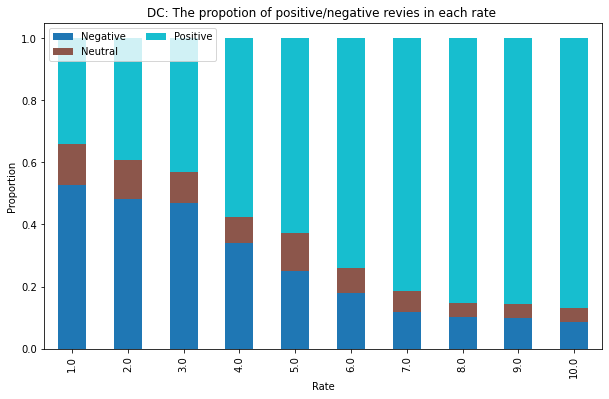

In [29]:
# visualize the porpotion of each sentiment in rating groups
cross_tab_prop = pd.crosstab(index=DC['rate'],
                             columns=DC['sentiment_VADER'],
                             normalize="index")
cross_tab_prop
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Rate")
plt.ylabel("Proportion")
plt.title('DC: The propotion of positive/negative revies in each rate ')
plt.show()

In [30]:
# apply for Marvel movies
Marvel['sentiment_VADER']=Marvel['content_cleaned'].apply(lambda x:sentiment_scores(x))

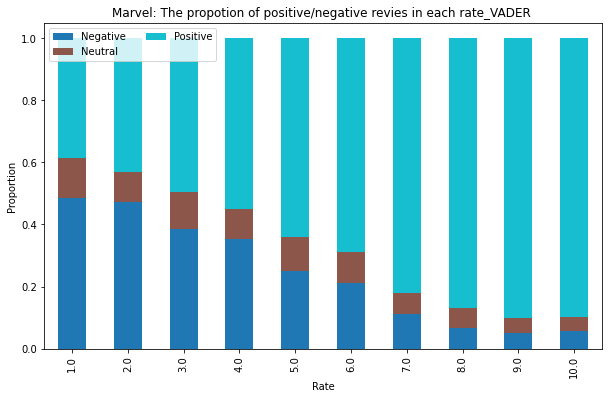

In [46]:
# visualize the porpotion of each sentiment in rating groups
cross_tab_prop = pd.crosstab(index=Marvel['rate'],
                             columns=Marvel['sentiment_VADER'],
                             normalize="index")
cross_tab_prop
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Rate")
plt.ylabel("Proportion")
plt.title('Marvel: The propotion of positive/negative revies in each rate_VADER ')
plt.show()

- Conclusion:
    - As we can see from the graphs, in rate groups (1,2,3) the positive reviews encountered for 30-50% of total propotion, therefore the VADER approach doesn't help us to have an appropriate results in this case
    - We try with other method named AFINN in the following part

### Sentiment Analysis with AFINN

In [38]:
from afinn import Afinn
afn = Afinn()

In [39]:
DC.head(10)

review_title       date  \
0                       Lying there Under, under the sea 2019-04-21   
1                                            Indifferent 2020-01-12   
2                                       CGI extravaganza 2019-03-08   
3        My Father Was The Keeper Of The Eddystone Light 2020-11-28   
4                                            King Arthur 2019-01-25   
5                                      A Great Adventure 2019-03-31   
6                        Does not play well with others. 2018-12-29   
7                                                  Fluid 2019-05-07   
8  "Legend has it that one day... a new king will come." 2018-12-29   
9                                                Aquaman 2018-12-20   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [43]:
def define_scores(sentence):
    if afn.score(sentence) > 0:
        return 'Positive'
    elif afn.score(sentence) < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [44]:
# apply afinn score in each data frame
DC['sentiment_AFINN']=DC['content_cleaned'].apply(lambda x:define_scores(x))

In [45]:
Marvel['sentiment_AFINN']=Marvel['content_cleaned'].apply(lambda x:define_scores(x))

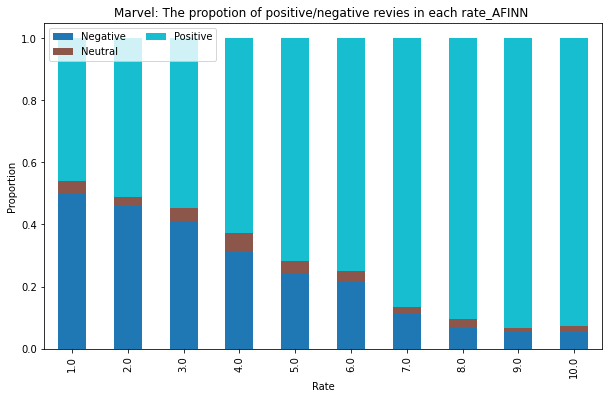

In [47]:
# visualize the porpotion of each sentiment in rating groups
cross_tab_prop = pd.crosstab(index=Marvel['rate'],
                             columns=Marvel['sentiment_AFINN'],
                             normalize="index")
cross_tab_prop
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Rate")
plt.ylabel("Proportion")
plt.title('Marvel: The propotion of positive/negative revies in each rate_AFINN ')
plt.show()

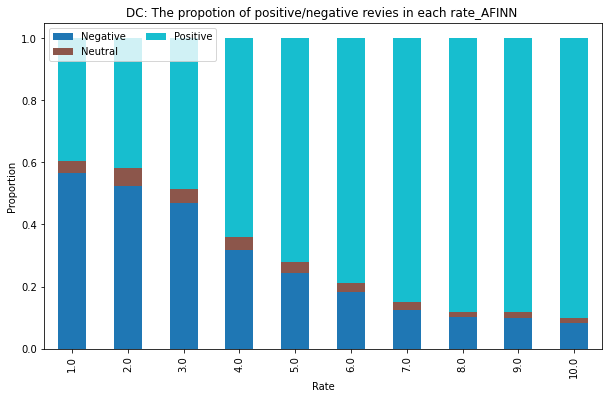

In [48]:
# visualize the porpotion of each sentiment in rating groups
cross_tab_prop = pd.crosstab(index=DC['rate'],
                             columns=DC['sentiment_AFINN'],
                             normalize="index")
cross_tab_prop
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Rate")
plt.ylabel("Proportion")
plt.title('DC: The propotion of positive/negative revies in each rate_AFINN ')
plt.show()

- Conclusion: After applying AFINN model, we can see that the model give us a bit worst result compare to VADER.
- Therefore, in oder to have a better classification aprroach for negative & possitive reviews, I decied to use supervised learning method to train a model based on a similar data set (IMDB data set with label from Kaggle)
and after that apply the prediction to classify negative and positive reviews in DC & Marvel. It will be explained in the second notebook